In [1]:
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()  # File upload dialog open karega

file_name = list(uploaded.keys())[0]  # Uploaded file ka naam le lo

df = pd.read_csv(io.BytesIO(uploaded[file_name]))  # CSV read karo DataFrame me

df.head()  # First 5 rows dikhata hai


Saving tmdb_5000_movies.csv to tmdb_5000_movies.csv


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [2]:
print("Rows, Columns:", df.shape)

df.info()  # Columns aur data type check karo

print("Missing values per column:")
print(df.isnull().sum())


Rows, Columns: (4803, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 


In [3]:
df.fillna({'homepage': 'Unknown', 'tagline': 'No Tagline'}, inplace=True)

df['overview'] = df['overview'].fillna('')  # Overview column me NaN na ho


In [4]:
import ast

def extract_genres(genre_str):
    try:
        genres_list = ast.literal_eval(genre_str)  # JSON jaisa string ko list me convert karo
        return [g['name'] for g in genres_list]  # Sirf genre names lo
    except:
        return []

df['genre_list'] = df['genres'].fillna('[]').apply(extract_genres)

df['main_genre'] = df['genre_list'].apply(lambda x: x[0] if x else 'Unknown')  # Pehla genre


/tmp/ipython-input-3399155800.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


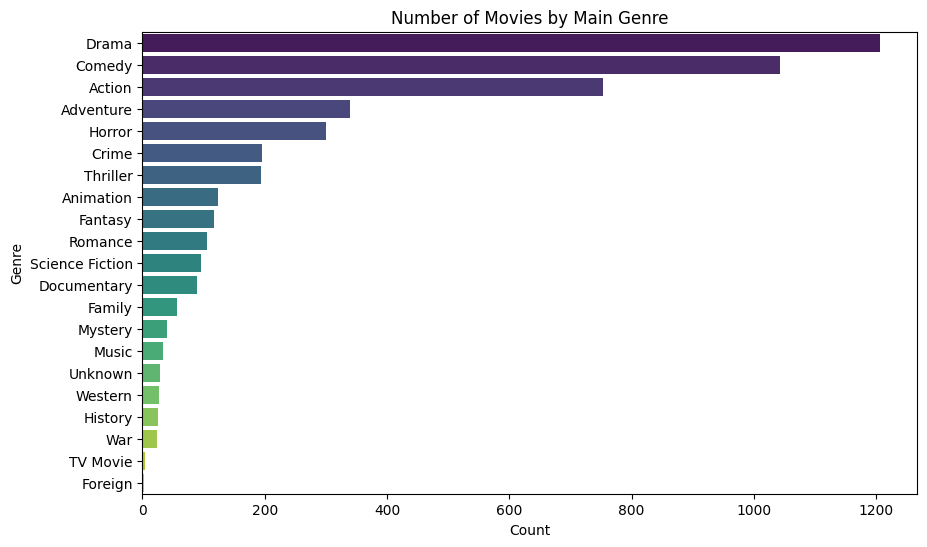

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

genre_counts = df['main_genre'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Number of Movies by Main Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


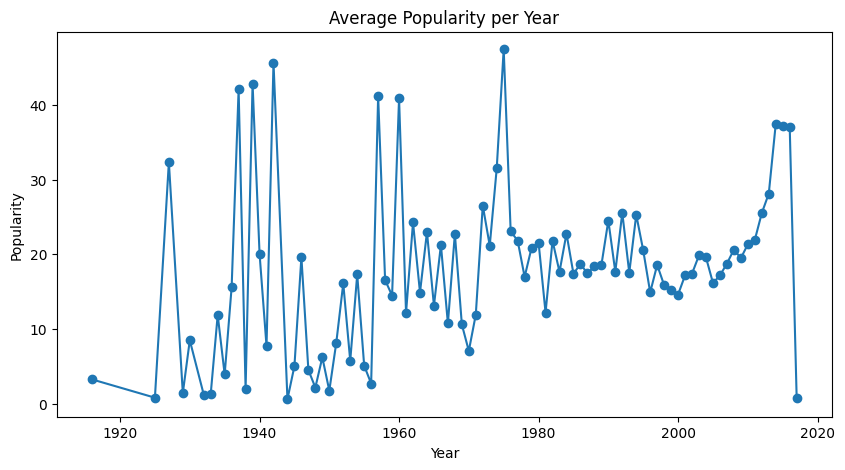

In [6]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

year_popularity = df.groupby('year')['popularity'].mean().dropna()

plt.figure(figsize=(10,5))
year_popularity.plot(kind='line', marker='o')
plt.title('Average Popularity per Year')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['overview'])

print("TF-IDF matrix ka shape:", tfidf_matrix.shape)


TF-IDF matrix ka shape: (4803, 20978)


In [8]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [9]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()


In [10]:
def get_recommendations(title, cosine_sim=cosine_sim):
    if title not in indices:
        return f"'{title}' dataset me nahi mila."

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Top 10 similar movies except khud movie

    movie_indices = [i[0] for i in sim_scores]

    return df[['title', 'main_genre', 'year']].iloc[movie_indices].reset_index(drop=True)


In [11]:
print(get_recommendations('The Dark Knight'))


                                     title main_genre    year
0                    The Dark Knight Rises     Action  2012.0
1                           Batman Returns     Action  1992.0
2  Batman: The Dark Knight Returns, Part 2     Action  2013.0
3                           Batman Forever     Action  1995.0
4                                   Batman    Fantasy  1989.0
5                            Batman Begins     Action  2005.0
6                                      JFK      Drama  1991.0
7       Batman v Superman: Dawn of Justice     Action  2016.0
8                                Slow Burn    Mystery  2005.0
9                           Batman & Robin     Action  1997.0


In [12]:
import ipywidgets as widgets
from IPython.display import display

# Function jo widget se selected movie ko recommend kare
def recommend_movie(title):
    recs = get_recommendations(title)
    display(recs)

# Dropdown widget for movie titles
movie_widget = widgets.Dropdown(
    options=df['title'].unique(),  # Saare movie titles as options
    description='Select Movie:',
    layout=widgets.Layout(width='70%')
)

# Link widget with recommendation function
widgets.interact(recommend_movie, title=movie_widget)


interactive(children=(Dropdown(description='Select Movie:', layout=Layout(width='70%'), options=('Avatar', "Pi…

<function __main__.recommend_movie(title)>

In [13]:
# Combine overview text + main genre for better similarity
df['combined_features'] = df['overview'] + " " + df['main_genre']


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

print("TF-IDF matrix shape (hybrid):", tfidf_matrix.shape)


TF-IDF matrix shape (hybrid): (4803, 20978)


In [15]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [16]:
def get_recommendations(title, cosine_sim=cosine_sim):
    if title not in indices:
        return f"'{title}' dataset me nahi mila."

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Top 10 similar movies

    movie_indices = [i[0] for i in sim_scores]
    return df[['title', 'main_genre', 'year']].iloc[movie_indices].reset_index(drop=True)


In [17]:
print(get_recommendations('The Dark Knight'))


                                     title main_genre    year
0                    The Dark Knight Rises     Action  2012.0
1                           Batman Returns     Action  1992.0
2  Batman: The Dark Knight Returns, Part 2     Action  2013.0
3                           Batman Forever     Action  1995.0
4                                   Batman    Fantasy  1989.0
5                            Batman Begins     Action  2005.0
6                                      JFK      Drama  1991.0
7       Batman v Superman: Dawn of Justice     Action  2016.0
8                                Slow Burn    Mystery  2005.0
9                      Law Abiding Citizen      Drama  2009.0


Saving tmdb_5000_movies.csv to tmdb_5000_movies (1).csv
Rows, Columns: (4803, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   flo

/tmp/ipython-input-2825600725.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


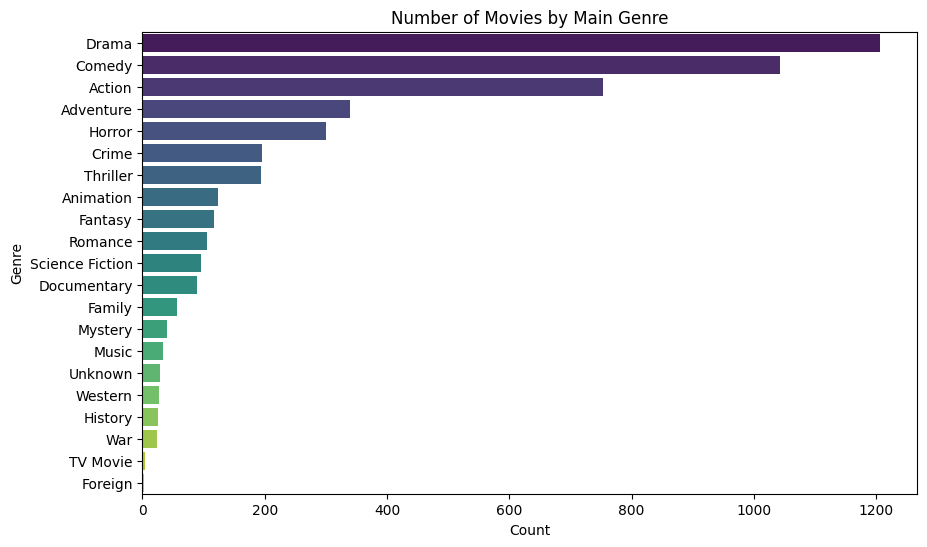

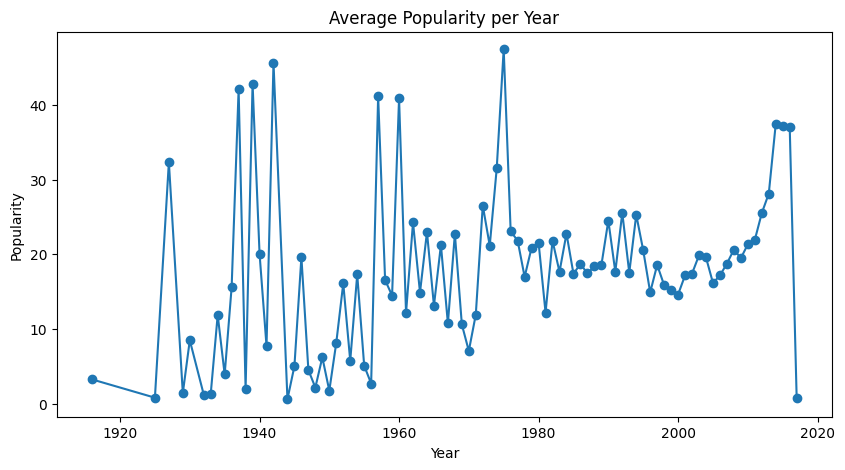

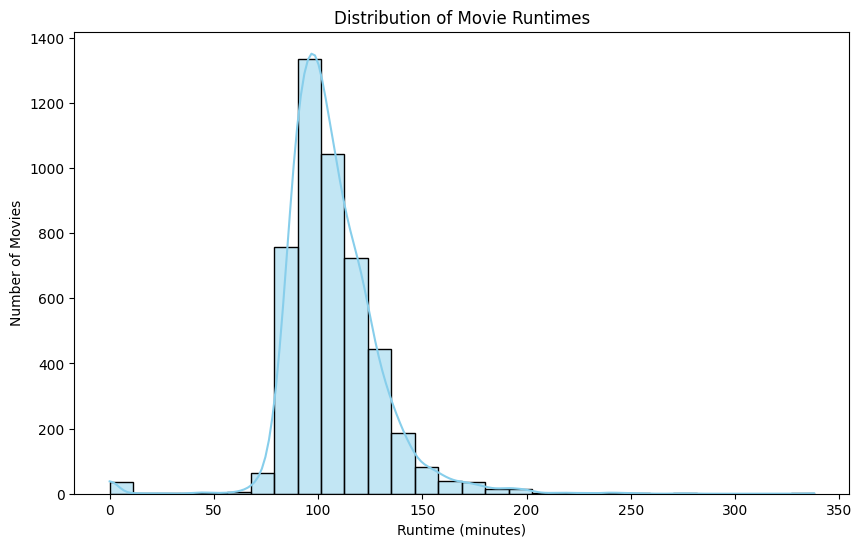

                                     title main_genre    year
0                    The Dark Knight Rises     Action  2012.0
1                           Batman Returns     Action  1992.0
2  Batman: The Dark Knight Returns, Part 2     Action  2013.0
3                           Batman Forever     Action  1995.0
4                                   Batman    Fantasy  1989.0
5                            Batman Begins     Action  2005.0
6                                      JFK      Drama  1991.0
7       Batman v Superman: Dawn of Justice     Action  2016.0
8                                Slow Burn    Mystery  2005.0
9                      Law Abiding Citizen      Drama  2009.0


interactive(children=(Dropdown(description='Select Movie:', layout=Layout(width='70%'), options=('Avatar', "Pi…

<function __main__.recommend_movie(title)>

In [18]:
# -----------------------------
# STEP 1: Upload CSV file
# -----------------------------
from google.colab import files
import io
import pandas as pd

uploaded = files.upload()  # CSV upload dialog

file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))
df.head()


# -----------------------------
# STEP 2: Data Inspection & Cleaning
# -----------------------------
print("Rows, Columns:", df.shape)
df.info()
print("Missing values per column:")
print(df.isnull().sum())

# Fill missing text columns
df.fillna({'homepage':'Unknown', 'tagline':'No Tagline'}, inplace=True)
df['overview'] = df['overview'].fillna('')


# -----------------------------
# STEP 3: Parse Genres
# -----------------------------
import ast

def extract_genres(genre_str):
    try:
        genres_list = ast.literal_eval(genre_str)
        return [g['name'] for g in genres_list]
    except:
        return []

df['genre_list'] = df['genres'].fillna('[]').apply(extract_genres)
df['main_genre'] = df['genre_list'].apply(lambda x: x[0] if x else 'Unknown')


# -----------------------------
# STEP 4: Exploratory Data Analysis (EDA)
# -----------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Top genres
genre_counts = df['main_genre'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title("Number of Movies by Main Genre")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

# Release date -> year
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['year'] = df['release_date'].dt.year

# Popularity per year
year_popularity = df.groupby('year')['popularity'].mean().dropna()
plt.figure(figsize=(10,5))
year_popularity.plot(kind='line', marker='o')
plt.title("Average Popularity per Year")
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.show()

# Runtime distribution
plt.figure(figsize=(10,6))
sns.histplot(df['runtime'].dropna(), bins=30, kde=True, color='skyblue')
plt.title("Distribution of Movie Runtimes")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Number of Movies")
plt.show()


# -----------------------------
# STEP 5: Create Hybrid Features for Recommendations
# -----------------------------
# Combine overview + main_genre
df['combined_features'] = df['overview'] + " " + df['main_genre']

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Mapping title -> index
indices = pd.Series(df.index, index=df['title']).drop_duplicates()


# -----------------------------
# STEP 6: Recommendation Function
# -----------------------------
def get_recommendations(title, cosine_sim=cosine_sim):
    if title not in indices:
        return f"'{title}' dataset me nahi mila."

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Top 10 similar movies

    movie_indices = [i[0] for i in sim_scores]
    return df[['title', 'main_genre', 'year']].iloc[movie_indices].reset_index(drop=True)


# Test example
print(get_recommendations('The Dark Knight'))


# -----------------------------
# STEP 7: Interactive Widget (Optional)
# -----------------------------
import ipywidgets as widgets
from IPython.display import display

def recommend_movie(title):
    recs = get_recommendations(title)
    display(recs)

movie_widget = widgets.Dropdown(
    options=df['title'].unique(),
    description='Select Movie:',
    layout=widgets.Layout(width='70%')
)

widgets.interact(recommend_movie, title=movie_widget)


In [19]:
!pip install gradio


In [20]:
import gradio as gr

# Function for recommendations
def recommend_movie_ui(movie_title):
    try:
        recommendations = get_recommendations(movie_title)
        return recommendations.to_string(index=False)
    except:
        return "Movie not found. Try another title."

# Movie list for dropdown
movie_list = df['title'].tolist()

# Create Gradio interface
iface = gr.Interface(
    fn=recommend_movie_ui,
    inputs=gr.Dropdown(movie_list, label="Select a Movie"),
    outputs="text",
    title="🎬 Movie Recommendation System",
    description="Select a movie and get top 10 similar movies based on overview similarity."
)


In [21]:
iface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2e59b553c7a5eb1e67.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [22]:
TMDB_API_KEY = "YOUR_API_KEY"
import requests

def fetch_poster(movie_id):
    url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={TMDB_API_KEY}&language=en-US"
    data = requests.get(url).json()
    poster_path = data.get('poster_path')
    if poster_path:
        return "https://image.tmdb.org/t/p/w500" + poster_path
    return None


In [23]:
def recommend_movie_ui(movie_title):
    try:
        recommendations = get_recommendations(movie_title)
        output_list = []
        for title in recommendations:
            # Movie ka ID fetch karo
            movie_id = df[df['title'] == title]['id'].values[0]
            poster = fetch_poster(movie_id)
            year = df[df['title'] == title]['release_date'].values[0][:4]
            rating = df[df['title'] == title]['vote_average'].values[0]
            output_list.append({
                "title": title,
                "year": year,
                "rating": rating,
                "poster": poster
            })
        return output_list
    except:
        return "Movie not found. Try another title."


In [25]:
import gradio as gr

movie_list = df['title'].tolist()


In [26]:
def format_for_gradio(movie_data):
    gallery_items = []
    for m in movie_data:
        if m['poster']:
            caption = f"{m['title']} ({m['year']}) ⭐ {m['rating']}"
            gallery_items.append((m['poster'], caption))
    return gallery_items


In [27]:
def recommend_gallery(movie_title):
    movies = recommend_movie_ui(movie_title)  # Tera recommendation function
    return format_for_gradio(movies)

with gr.Blocks() as demo:
    gr.Markdown("## 🎬 Movie Recommendation System")
    movie_input = gr.Dropdown(movie_list, label="Select a Movie")
    gallery_output = gr.Gallery(label="Recommended Movies", columns=2, height="auto")

    movie_input.change(fn=recommend_gallery, inputs=movie_input, outputs=gallery_output)

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9c05ff03bf96a0006d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [29]:
from google.colab import files
uploaded = files.upload()


Saving tmdb_5000_movies.csv to tmdb_5000_movies (2).csv


In [2]:
['genres', 'keywords', 'tagline', 'cast', 'director']


['genres', 'keywords', 'tagline', 'cast', 'director']